# Maki-Thompson Model: Quasi-Stationary (QS) vs Standard

Comparison of the MT rumour-spreading model on a Random Regular Graph (RRG) using:
- **QS method** (`qs=True`): quasi-stationary state maintained via a backup memory of size `M`
- **Standard method**: single finite or endemic realization

All functions are imported from the `ruscs` package.


In [4]:
import random
import matplotlib.pyplot as plt

from ruscs.init_network import initialize_network_RRG_list
from ruscs.mt_density_dyn_qs import mt_density_dynamic_qs
from ruscs.mt_density import mt_density
from ruscs.utils import linear_increase, rolling_autocorrelation

plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'mathtext.rm': 'serif',
})

Model MT modified: Single absorbing state
Restoring backup
Iterations: 1000
Reached max iterations. Ending endemic realization.
Model MT modified: Single absorbing state


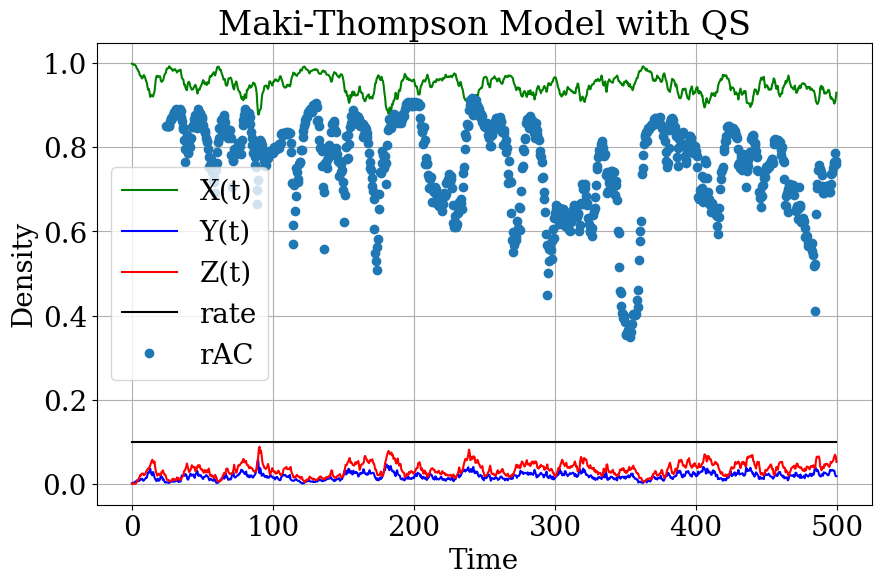

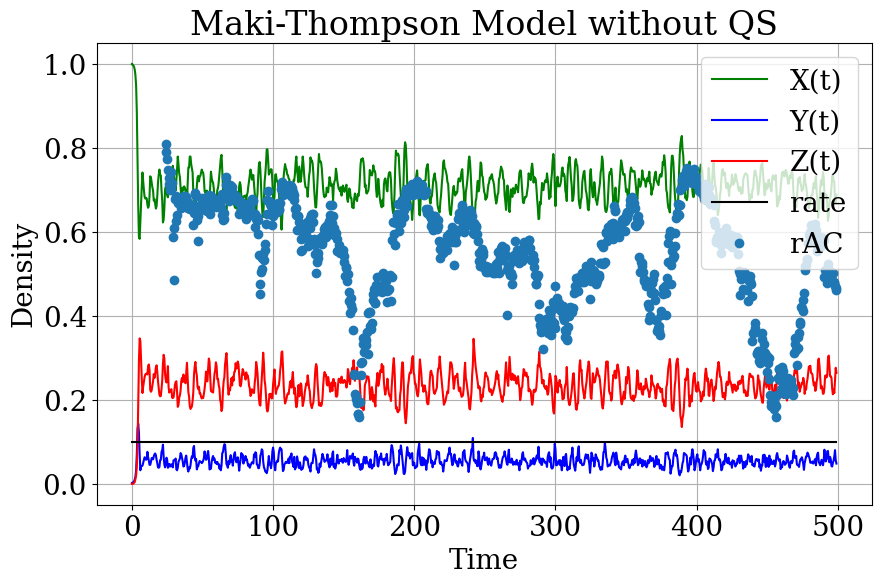

In [5]:
# Test QS
N = 1000
degree = 10

rate = 0.1
alfa = 0.5
delta = 0.89
maxiter = 1000
ini_inf = 1
coverage = 2
neighborz, kmax = initialize_network_RRG_list(N, degree)

infected = [random.randint(0, N-1) for i in range(ini_inf)]
rate_vector = linear_increase(total_length = maxiter, y_min = 0.1, y_max = 0.1, steps_wait = 500, steps_increase = 200)
n = 1
res = mt_density_dynamic_qs(
    rate_vector,
    alfa,
    delta,
    maxiter,
    neighborz,
    kmax,
    initial_infected = ini_inf,
    qs = True,
    M = 10,
    n = n,
    C_max = coverage,
    step_size = 0.5,
    return_timeseries = True,
    return_symbolic = True,
    realization_type = 1,
    show_prints_process = False,
    show_prints = True
)
res2 = mt_density(
    0.3,
    alfa,
    delta,
    maxiter,
    neighborz,
    kmax,
    initial_infected = ini_inf,
    n = n,
    C_max = 2,
    step_size = 0.5,
    show_prints = False
)

n += 1

density_y = res[1]
density_z = res[2]
time_vector = res[0]

# Plot results
density_x = 1 - density_y - density_z

# Compute autocorrelation y
autocor = rolling_autocorrelation(density_y, 50, lag = 1)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_vector, density_x, label="X(t)", color="green")
plt.plot(time_vector, density_y, label="Y(t)", color="blue")
plt.plot(time_vector, density_z, label="Z(t)", color="red")
plt.plot(time_vector, rate_vector, label = "rate", color = "black")

# plot autocor
for lag_i in range(len(autocor)):
    plt.plot(time_vector, autocor[lag_i], 'o', label = "rAC")

plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Maki-Thompson Model with QS")
plt.legend()
plt.grid()
plt.show()

# res2
density_y = res2[1]
density_z = res2[2]
time_vector = res2[0]

# Plot results
density_x = 1 - density_y - density_z

# Compute autocorrelation y
autocor = rolling_autocorrelation(density_y, 50, lag = 1)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_vector, density_x, label="X(t)", color="green")
plt.plot(time_vector, density_y, label="Y(t)", color="blue")
plt.plot(time_vector, density_z, label="Z(t)", color="red")
plt.plot(time_vector, rate_vector[:len(res2[1])], label = "rate", color = "black")

# plot autocor
for lag_i in range(len(autocor)):
    plt.plot(time_vector, autocor[lag_i], 'o', label = "rAC")

plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Maki-Thompson Model without QS")
plt.legend()
plt.grid()
plt.show()